![](https://uploads-ssl.webflow.com/62233c592d2a1e009d42f46c/6414802c0a2bea367cbc795b_logo-jedha-square.svg)

<h1 style="text-align: left; color:#20a08d; font-size: 40px"><span><strong>RLlib 🤼
</strong></span></h1>

<h2 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong>Qu'allez-vous apprendre dans ce cours ? 🧐🧐
</strong></span></h2>

Lorsque vous réalisez des travaux d'apprentissage par renforcement, vous souhaiterez les distribuer sur plusieurs nœuds. Il n'y a pas de meilleurs candidats que [RLlib](https://docs.ray.io/en/latest/rllib/index.html) pour ça ! Il s'agit d'un package livré avec `ray` qui vous permet de distribuer votre travail d'apprentissage par renforcement dans un cluster ray. Dans ce cours, nous apprendrons :

- Comment configurer votre environnement local pour utiliser RLlib
- Comment créer des tâches de formation RLlib
- Comment personnaliser les tâches de d'entrainement RLlib classiques
- Comment enregistrer les poids d'un modèle et le tester dans un environnement réel

<h2 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong>Définissez votre environnement
</strong></span></h2>

Avec RLlib, nous vous déconseillons d'utiliser Docker comme environnement standardisé car vous aurez des difficultés à visualiser les jeux vidéo car vous aurez besoin de faire des installations supplémentaires (installations difficiles).

Vous devriez plutôt utiliser des environnements `conda` ou `pip`  ! C'est une autre façon de créer des environnements mais cette fois, vous séparez complètement votre machine locale du code (comme vous le feriez avec des conteneurs). Voici comment procéder :

**CONDA**
- Créez votre environnement : `conda create -n my_env`
- Activez votre environnement : `conda activate my_env`

**PIP**
- Installez virtualenv : `pip3 install virtualenv`
- Créez votre environnement : `virtualenv my_env`
- Activez votre environnement : `. my_env/bin/activate`

<div class="alert alert-warning">
  <strong>NOTE!</strong><br><br> Pour vérifier que votre environnement a bien été activé, vous devriez voir sur votre terminal le nom de votre environnement changer de :
    <code>(base) ➜ my_directory</code> to <code>(my_env) ➜ my_directory</code>
</div>

Vous pouvez maintenant commencer à installer les packages dont vous avez besoin en utilisant `pip` ou `conda`!

Une fois que vous avez terminé avec votre environnement, vous pouvez :

**CONDA**
- Désactivez votre environnement : `conda deactivate`
- Supprimer votre environnement : `conda remove -n my_env --all`

**CONDA**
- Désactivez votre environnement : `deactivate`
- Supprimer votre environnement : `rm -r my_env`

<div class="alert alert-info">
  <strong>INSTALLATION!</strong><br><br> Nous supposons dans cette section qu'Anaconda est déjà installé sur votre machine. Si ce n'est pas le cas, tout ce qui est écrit ci-dessus ne fonctionnera pas. Vous devrez d'abord installer <code>conda</code>. <a href="https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html">Voici comment faire</a>
</div>

<h2 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong>Créer une tache d'entrainement RLlib 🛰️
</strong></span></h2>

Créons notre premier travail d'entraînement en utilisant RLlib ! Pour cela, nous allons entrainer un agent sur Open AI Gym. [`LunarLander-v2`](https://www.gymlibrary.dev/environments/box2d/lunar_lander/). Le but est simple : *faire atterrir notre vaisseau spatial entre les deux drapeaux* . Allons-y! 💪

<h3 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong>Installation
</strong></span></h3>

Tout d'abord, configurons notre environnement. Nous allons créer un répertoire de travail appelé **lunar_lander** et nous allons d'abord créer un fichier `requirements.txt` :

```
|-lunar_lander
|-- requirements.txt
```

À l'intérieur de `requirements.txt` vous aurez le contenu suivant :

```
ray[rllib]
tensorflow
gym[atari]
gym[accept-rom-license]
atari_py
box2d
pyglet
```

Enregistrez votre fichier et créez maintenant votre environnement `conda` ou `pip` et installez toutes vos dépendances :

**CONDA**

```shell
conda create -n rllib python=3.7.7
conda activate rllib
pip install -r requirements.txt
```
**PIP**
```shell
virtualenv rllib
. rllib/bin/activate
pip install -r requirements.txt
```

In [ ]:
!python3 -V

Python 3.10.12


In [1]:
!mkdir lunar_lander

In [2]:
%%writefile lunar_lander/requirements.txt
ray[rllib]==2.0.
pydantic<2
tensorflow
gym[atari]
gym[accept-rom-license]
atari_py
box2d-py
pyglet
pygame
#numpy==1.21.6
numpy==1.23.5

Writing lunar_lander/requirements.txt


In [3]:
!apt install swig # Linux
#!brew install swig # Mac OS
#!choco install swig # Windows

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 32 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 2s (573 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubunt

In [4]:
!pip3 install -U -r lunar_lander/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 55.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.6/540.6 kB 46.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.5/374.5 kB 33.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.3/858.3 kB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/

Tout est prêt !

<h3 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong>Environnement - Facultatif
</strong></span></h3>

Cette partie est facultative, mais c'est toujours une bonne pratique de vérifier si tout fonctionne dans notre environnement. Cela vous facilitera la vie lorsque vous aurez besoin de déboguer plus tard ! Par conséquent, dans votre répertoire de travail **lunar_lander** , créez un nouveau fichier appelé `test_env.py`:

```
|-lunar_lander
|-- requirements.txt
|-- test_env.py
```

Profitons-en pour créer un dossier "assets" contiendra les gifs générés par les rendus de notre environnement et un dossier "checkpoints" qui contiendra les poids des modèles.
```
|-lunar_lander
|-- assets
|-- checkpoints
|-- requirements.txt
|-- test_env.py

```

In [3]:
!mkdir lunar_lander/assets
!mkdir lunar_lander/checkpoints

À l'intérieur de `test_env.py` ajoutez le contenu suivant :

```python
import gym
env = gym.make("LunarLander-v2", render_mode="human")
env.action_space.seed(42) # randomize action space from the environment

observation = env.reset()[0] # Start environment from scratch

# Render each action 10000 times (You could understanding also as 10000 frames)
for _ in range(10000):
    observation, reward, done, info, _ = env.step(env.action_space.sample()) # setting random actions for each step
    env.render()
    # Reset the environment if the agent is done
    if done:
        observation = env.reset()

env.close()
```

Vous devriez maintenant pouvoir exécuter : `python test_env.py` et commencer à voir votre agent effectuer des actions aléatoires !

![crack](https://lead-program-assets.s3.eu-west-3.amazonaws.com/M02-Reinforcement_learning/random_lunar_lander.gif)

In [4]:
%%writefile lunar_lander/test_env.py
import gym
from PIL import Image
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

env = gym.make("LunarLander-v2")
env.action_space.seed(42) # randomize action space from the environment

observation = env.reset()[0] # Start environment from scratch
arr = []

# Render each action 10000 times (You could understanding also as 10000 frames)
for _ in range(1000):
    observation, reward, done, info = env.step(env.action_space.sample()) # setting random actions for each step
    render_img = env.render(mode="rgb_array")
    arr.append(render_img)
    # Reset the environment if the agent is done
    if done:
        observation = env.reset()

env.close()

imgs = [Image.fromarray(img) for img in arr]
save_path = os.path.join(os.getcwd(),"lunar_lander", "assets","random_lunar_lander.gif")
imgs[0].save(save_path, save_all=True, append_images=imgs[1:], duration=50, loop=0)

Overwriting lunar_lander/test_env.py


In [ ]:
!python3 lunar_lander/test_env.py
from IPython.display import Image
Image(open('lunar_lander/assets/random_lunar_lander.gif','rb').read())

<div class="alert alert-info">
  <strong>CRÉER UN ENVIRONNEMENT PERSONNALISÉ!</strong><br><br> Au fur et à mesure que vous acquerrez de l'expérience dans l'apprentissage par renforcement, vous souhaiterez peut-être utiliser des environnements personnalisés. Même si cela dépasse largement le cadre de ce cours, c'est tout à fait possible avec RLlib. N'hésitez pas à lire <a href="https://docs.ray.io/en/latest/rllib/rllib-env.html">cette documentation </a> pour en savoir plus
</div>

<h3 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong>Boucle d'entraînement
</strong></span></h3>

Il est maintenant temps d'entrainer un modèle. Créons ici un fichier `train.py` dans notre répertoire de travail :
```
|-lunar_lander
|-- assets
|-- checkpoints
|-- requirements.txt
|-- test_env.py
|-- train.py
```

Voici le contenu complet du fichier :
```python
# Import the RL algorithm (Trainer) we would like to use.
from ray.rllib.algorithms.ppo import PPO
import ray

# Configure the algorithm.
config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "LunarLander-v2",

    # Use 0 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    # Since we are first running locally, we don't need remote workers
    "num_workers": 0,

    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "tf",

    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "fcnet_hiddens": [64, 64],
        "fcnet_activation": "relu",
    },

    # Give a custom batch size to our environment
    # The higher the batch size, the higher the need of memory
    # minimum is 200
    "train_batch_size": 256,

    # All RLlib algorithms come with two preprocessors
    # "deepmind" or "rllib"
    # "deepmind" is for atari games
    # "rllib" is more classic
    # If you are using custom environment, you will need custom preprocessors or you can
    # set it to None
    # For Custom Preprocessor, check out this doc 👉 https://docs.ray.io/en/latest/rllib/rllib-models.html#custom-preprocessors-and-environment-filters
    "preprocessor_pref": "deepmind",

}

# Create our RLlib Trainer.
trainer = PPOTrainer(config=config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
max_range=100
for i in range(1, max_range+1):
    print(f"#### ITERATION {i} ####")
    result = trainer.train()
```

Maintenant, exécutez simplement : `python train.py` et après quelques minutes, votre algorithme sera prêt à fonctionner !

In [ ]:
%%writefile lunar_lander/train.py
# Import the RL algorithm (Trainer) we would like to use.
from ray.rllib.algorithms.ppo import PPO
import tqdm

# Configure the algorithm.
config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "LunarLander-v2",

    # Use 0 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    # Since we are first running locally, we don't need remote workers
    "num_workers": 0,

    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "tf",

    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "fcnet_hiddens": [64, 64],
        "fcnet_activation": "relu",
    },

    # Give a custom batch size to our environment
    # The higher the batch size, the higher the need of memory
    # minimum is 200
    "train_batch_size": 256,

    # All RLlib algorithms come with two preprocessors
    # "deepmind" or "rllib"
    # "deepmind" is for atari games
    # "rllib" is more classic
    # If you are using custom environment, you will need custom preprocessors or you can
    # set it to None
    # For Custom Preprocessor, check out this doc 👉 https://docs.ray.io/en/latest/rllib/rllib-models.html#custom-preprocessors-and-environment-filters
    "preprocessor_pref": "deepmind",

}

# Create our RLlib Trainer.
trainer = PPO(config=config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
max_range=10000

for i in tqdm.tqdm(range(1, max_range+1)):
    print(f"#### ITERATION {i} ####")
    result = trainer.train()

Overwriting lunar_lander/train.py


In [ ]:
!python3 lunar_lander/train.py

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implem

<div class="alert alert-success">
  <strong>CHANGEZ ET PERSONNALISEZ VOTRE MODÈLE!</strong><br><br> Dans l'exemple ci-dessus, nous avons utilisé <a href="https://paperswithcode.com/method/ppo#:~:text=Proximal%20Policy%20Optimization%2C%20or%20PPO,using%20only%20first%2Dorder%20optimization."><strong>PPO</strong></a> le modèle qui est l'abréviation de Proximal Policy Optimization. Vous voudrez peut-être essayer d'autres algorithmes et vous auriez raison de le faire ! RLlib est livré avec de nombreux modèles RL que vous pouvez utiliser. Parmi eux, A3C, Thompson Sampling, Deep Q-Learning... N'hésitez pas à consulter le <a href="https://docs.ray.io/en/latest/rllib/rllib-algorithms.html">catalogue complet des modèles rllib </a>. <br><br>Si tous les algorithmes prédéfinis ne vous conviennent pas, RLlib propose un moyen de <strong>créer des modèles personnalisés</strong> . <a href="https://docs.ray.io/en/latest/rllib/rllib-models.html#customizing-preprocessors-and-models">Consultez cette documentation </a> pour savoir comment procéder.
</div>

<h3 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong>Checkpoints des agents entrainés
</strong></span></h3>

Maintenant, votre algorithme ne sera pas très utile si vous ne pouvez pas charger les poids après entrainement et tester votre agent. Pour faire persister les modèles, vous aurez besoin de `.save()` votre modèle en utilisant des **checkpoints** . Voici comment faire:

Dans votre fichier `train.py`  ajoutez simplement :

```python
# Import the RL algorithm (Trainer) we would like to use.
from ray.rllib.algorithms.ppo import PPO
import ray

# Configure the algorithm.
config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "LunarLander-v2",

    # Use 0 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    # Since we are first running locally, we don't need remote workers
    "num_workers": 0,

    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "tf",

    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "fcnet_hiddens": [64, 64],
        "fcnet_activation": "relu",
    },

    # Give a custom batch size to our environment
    # The higher the batch size, the higher the need of memory
    # minimum is 200
    "train_batch_size": 256,

    # All RLlib algorithms come with two preprocessors
    # "deepmind" or "rllib"
    # "deepmind" is for atari games
    # "rllib" is more classic
    # If you are using custom environment, you will need custom preprocessors or you can
    # set it to None
    "preprocessor_pref": "deepmind",

}

# Create our RLlib Trainer.
trainer = PPO(config=config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
max_range=500
for i in range(1, max_range+1):
    print(f"#### ITERATION {i} ####")
    result = trainer.train()

    # 👇 will save your model once it reaches the last iteration
    if i % max_range == 0:
       checkpoint = trainer.save()
       print("checkpoint saved at", checkpoint)
```

<div class="alert alert-info">
  <strong>NOTE</strong><br><br> Par défaut, les points de contrôle seront enregistrés dans <code>/Users/USERNAME/ray_results</code>. Vous pouvez spécifier le chemin exact en l'ajoutant simplement dans <code>trainer.save(YOUR_CUSTOM_PATH)</code>
    Ce que nous vous conseillons, c'est de tirer parti de la bibliothèque <code>os</code>  pour faire quelque chose comme <code>trainer.save(os.getcwd())</code>😉
</div>

In [ ]:
%%writefile lunar_lander/train.py
# Import the RL algorithm (Trainer) we would like to use.
from ray.rllib.algorithms.ppo import PPO
import tqdm

# Configure the algorithm.
config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "LunarLander-v2",

    # Use 0 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    # Since we are first running locally, we don't need remote workers
    "num_workers": 0,

    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "tf",

    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "fcnet_hiddens": [64, 64],
        "fcnet_activation": "relu",
    },

    # Give a custom batch size to our environment
    # The higher the batch size, the higher the need of memory
    # minimum is 200
    "train_batch_size": 256,

    # All RLlib algorithms come with two preprocessors
    # "deepmind" or "rllib"
    # "deepmind" is for atari games
    # "rllib" is more classic
    # If you are using custom environment, you will need custom preprocessors or you can
    # set it to None
    "preprocessor_pref": "deepmind",

}

# Create our RLlib Trainer.
trainer = PPO(config=config)
#trainer = PPOTrainer(config=config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
max_range=100
for i in tqdm.tqdm(range(1, max_range+1)):
    print(f"#### ITERATION {i} ####")
    result = trainer.train()

    # 👇 will save your model once it reaches the last iteration
    if i % max_range == 0:
       checkpoint = trainer.save()
       print("checkpoint saved at", checkpoint)

Overwriting lunar_lander/train.py


In [ ]:
!python3 lunar_lander/train.py

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implem

<h3 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong>Visualisez les résultats
</strong></span></h3>
Maintenant, visualisons enfin nos résultats ! C'est la partie passionnante 🤗

Créons enfin un fichier final appelé `test.py` comme ceci :

```
|-lunar_lander
|-- requirements.txt
|-- test_env.py
|-- train.py
|-- test.py
```

Dans ce fichier, nous n'allons pas entrainer mais simplement tester notre modèle. Vous pouvez ajouter le contenu suivant :

```python
# Import the RL algorithm (Trainer) we would like to use.
from ray.rllib.algorithms.ppo import PPO
import gym
import time

#### We reinstanciate our model ####
config = {
    "env": "LunarLander-v2",
    "num_workers": 0,
    "framework": "tf",
    "model": {
        "fcnet_hiddens": [64, 64],
        "fcnet_activation": "relu",
    },
    "train_batch_size": 256,
    "preprocessor_pref": "deepmind",
}

trainer = PPO(config=config)
#######################################


### Loads latest checkpoint from path
trainer.restore('/Users/myuser/ray_results/PPO_LunarLander-v2_2023-07-03_20-01-23k9riby6d/checkpoint_010000/checkpoint-10000')


## We need to preprocess our environment according to what our model did
# Remember in our config, we used preprocess: "deepmind"
# That's why we are importing `get_processor`
# You wouldn't have to do that if you used preprocessor: None
from ray.rllib.models.preprocessors import get_preprocessor

# Create the env to do inference in.
env = gym.make("LunarLander-v2")

## Create and apply preprocessor
prep = get_preprocessor(env.observation_space)(env.observation_space)
obs = prep.transform(env.reset())

episode_reward = 0.0

# Compute one full episode
done=False
while not done:

    print("### COMPUTING ACTION ####")
    # Compute an action (`a`).
    a = trainer.compute_single_action(obs, explore=True)

    # Send the computed action `a` to the env.
    obs, reward, done, _ = env.step(a)
    episode_reward += reward # Calculate rewards

    env.render()
    time.sleep(1/30) # Slow down image rendering to 30 frames per second

    if done:
        print(f"Episode done: Total reward = {episode_reward}")
        env.reset()
```



In [ ]:
%%writefile lunar_lander/test.py
# Import the RL algorithm (Trainer) we would like to use.
from ray.rllib.algorithms.ppo import PPO
import gym
import time
from PIL import Image
import numpy as np
import os

#### We reinstanciate our model ####
config = {
    "env": "LunarLander-v2",
    "num_workers": 0,
    "framework": "tf",
    "model": {
        "fcnet_hiddens": [64, 64],
        "fcnet_activation": "relu",
    },
    "train_batch_size": 256,
    "preprocessor_pref": "deepmind",
}

trainer = PPO(config=config)
#######################################

### Loads latest checkpoint from path
CHECKPOINT_PATH = "/root/ray_results/PPO_LunarLander-v2_2023-08-11_11-59-25_u69calm/checkpoint_001000"

trainer.restore(CHECKPOINT_PATH)


## We need to preprocess our environment according to what our model did
# Remember in our config, we used preprocess: "deepmind"
# That's why we are importing `get_processor`
# You wouldn't have to do that if you used preprocessor: None
from ray.rllib.models.preprocessors import get_preprocessor

# Create the env to do inference in.
env = gym.make("LunarLander-v2")

## Create and apply preprocessor
prep = get_preprocessor(env.observation_space)(env.observation_space)
obs = prep.transform(env.reset())

episode_reward = 0.0

# Compute one full episode
done=False
arr = []
while not done:

    # Compute an action (`a`).
    a = trainer.compute_single_action(obs, explore=True)

    # Send the computed action `a` to the env.
    obs, reward, done, _ = env.step(a)
    episode_reward += reward # Calculate rewards

    render_img = env.render(mode="rgb_array")
    arr.append(render_img)

    time.sleep(1/30) # Slow down image rendering to 30 frames per second

    if done:
        print(f"Episode done: Total reward = {episode_reward}")
        env.reset()

env.close()

imgs = [Image.fromarray(img) for img in arr]
save_path = os.path.join(os.getcwd(),"lunar_lander", "assets","trained_lunar_lander.gif")
imgs[0].save(save_path, save_all=True, append_images=imgs[1:], duration=50, loop=0)

Overwriting lunar_lander/test.py


/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implem

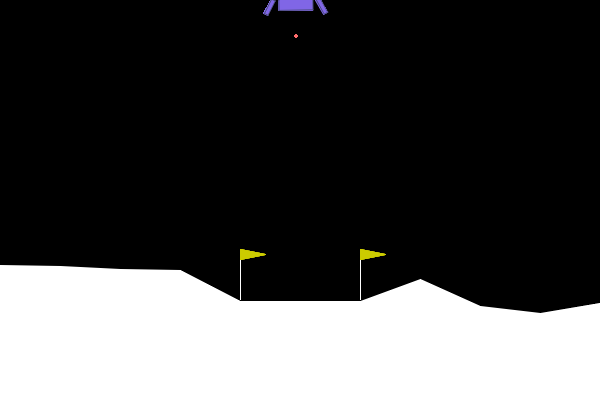

In [ ]:
!python3 lunar_lander/test.py
from IPython.display import Image
Image(open('lunar_lander/assets/trained_lunar_lander.gif','rb').read())

# **Test avec des modèles pré-entrainés**

In [ ]:
import os
import urllib
import zipfile

# Define paths and urls
CHECKPOINT_URL = "https://github.com/archiducarmel/jedha-lead-ds/releases/download/checkpoints/PPO_LunarLander-v2_2023-07-04_17-09-28makul05p.zip"
CHECKPOINT_FOLDER = os.path.join(os.getcwd(),"lunar_lander", "checkpoints")

# Unzip
zip_path, _ = urllib.request.urlretrieve(CHECKPOINT_URL)
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(CHECKPOINT_FOLDER)
print(os.listdir(CHECKPOINT_FOLDER))

['PPO_LunarLander-v2_2023-07-04_17-09-28makul05p']


In [ ]:
%%writefile lunar_lander/test.py
# Import the RL algorithm (Trainer) we would like to use.
from ray.rllib.algorithms.ppo import PPO
import gym
import time
from PIL import Image
import numpy as np
import os

#### We reinstanciate our model ####
config = {
    "env": "LunarLander-v2",
    "num_workers": 0,
    "framework": "tf",
    "model": {
        "fcnet_hiddens": [64, 64],
        "fcnet_activation": "relu",
    },
    "train_batch_size": 256,
    "preprocessor_pref": "deepmind",
}

trainer = PPO(config=config)
#######################################

CHECKPOINT_PATH = "/content/lunar_lander/checkpoints/PPO_LunarLander-v2_2023-07-04_17-09-28makul05p/checkpoint_100000"
### Loads latest checkpoint from path
trainer.restore(CHECKPOINT_PATH)


## We need to preprocess our environment according to what our model did
# Remember in our config, we used preprocess: "deepmind"
# That's why we are importing `get_processor`
# You wouldn't have to do that if you used preprocessor: None
from ray.rllib.models.preprocessors import get_preprocessor

# Create the env to do inference in.
env = gym.make("LunarLander-v2")

## Create and apply preprocessor
prep = get_preprocessor(env.observation_space)(env.observation_space)
obs = prep.transform(env.reset())

episode_reward = 0.0

# Compute one full episode
done=False
arr = []
while not done:

    # Compute an action (`a`).
    a = trainer.compute_single_action(obs, explore=True)

    # Send the computed action `a` to the env.
    obs, reward, done, _ = env.step(a)
    episode_reward += reward # Calculate rewards

    render_img = env.render(mode="rgb_array")
    arr.append(render_img)

    time.sleep(1/30) # Slow down image rendering to 30 frames per second

    if done:
        print(f"Episode done: Total reward = {episode_reward}")
        env.reset()

env.close()

imgs = [Image.fromarray(img) for img in arr]
save_path = os.path.join(os.getcwd(),"lunar_lander", "assets","pretrained_lunar_lander.gif")
imgs[0].save(save_path, save_all=True, append_images=imgs[1:], duration=50, loop=0)

Writing lunar_lander/test.py


/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implem

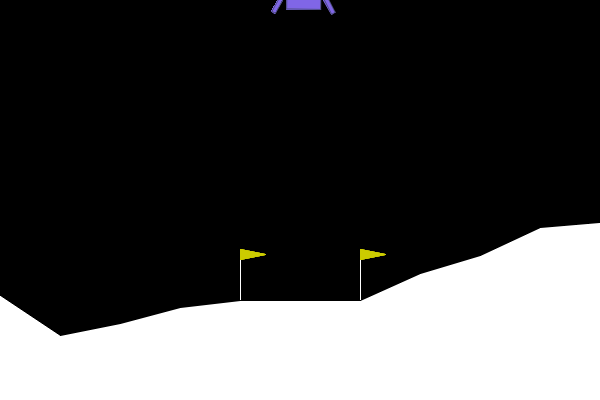

In [ ]:
!python3 lunar_lander/test.py
from IPython.display import Image
Image(open('lunar_lander/assets/pretrained_lunar_lander.gif','rb').read())

Et maintenant, vous pouvez profiter de votre agent essayant d'agir intelligemment �

Par exemple, voici un épisode après 10 000 itérations :

![smart_lunar_lander](https://lead-program-assets.s3.eu-west-3.amazonaws.com/M02-Reinforcement_learning/smart_lunar_lander.gif)

Si vous voulez être un peu "pythonique", vous pouvez déplacer votre variable config  dans un fichier config.py  puis l'importer à la fois dans train.py et test.py comme ceci :


```
|-lunar_lander
|-- requirements.txt
|-- test_env.py
|-- train.py
|-- test.py
|-- config.py
```

où `config.py` contient:

```python
config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "LunarLander-v2",

    # Use 2 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    "num_workers": 0,
    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "tf",
    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "render_env": False,

    "model": {
        "fcnet_hiddens": [64, 64],
        "fcnet_activation": "relu",
    },

    "train_batch_size": 256,

    "preprocessor_pref": "deepmind",

    # Set up a separate evaluation worker set for the
    # `trainer.evaluate()` call after training (see below).
    "evaluation_num_workers": 0,
}
```

puis remplacer la variable `config`  dans `train.py` et `test.py` par:

```python
from config import config

trainer = PPOTrainer(config=config)
```